In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
%matplotlib inline  

## Read in the data
I am using a JSON file that gathered song info from my personal playlists (1608 unique songs)

In [2]:
data = pd.read_json('songs.txt')
print(data.shape)
data.head()

(1608, 18)


,acousticness,artist,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,time_signature,valence
0,0.2110,Various Artists,0.772,385438,0.482,False,7qfoq1JFKBUEIvhqOHzuqX,0.000000,6,0.223,-9.529,1,Non-Stop,68,0.3510,92.017,4,0.441
1,0.6000,Billy Joel,0.334,336093,0.472,False,3FCto7hnn1shUyZL42YgfO,0.000004,0,0.317,-8.792,1,Piano Man,74,0.0277,179.167,3,0.431
2,0.0152,Maroon 5,0.728,231173,0.620,False,0tuyEYTaqLxE41yGHSsXjy,0.000000,3,0.227,-3.735,1,Won't Go Home Without You,62,0.0308,110.023,4,0.453
3,0.8340,Chris Thile,0.403,342653,0.387,False,6ghXD44kT8wqM1hty9NGgO,0.699000,9,0.181,-11.312,1,Attaboy,44,0.0397,126.283,4,0.588
4,0.0606,Mumford & Sons,0.576,217987,0.486,False,3pLTOP0G0etiWUknFoRpsr,0.000143,4,0.093,-9.364,1,The Cave,50,0.0406,141.951,4,0.337


In [3]:
def show_hist(df, attribute):
    plt.hist(x=df[attribute], bins=40)
    plt.title("Frequency of '%s'" % attribute)
    plt.xlabel(attribute)
    plt.ylabel("Count")
    plt.show()

## Show the distribution of all numerical attributes

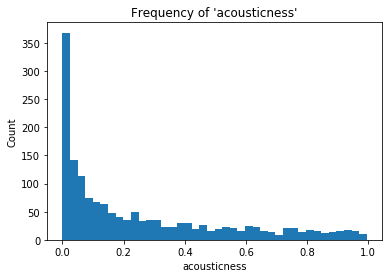

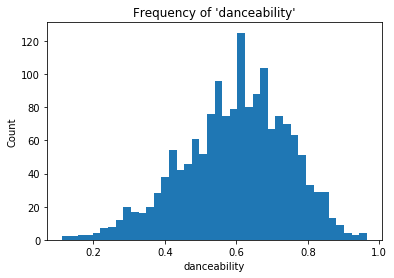

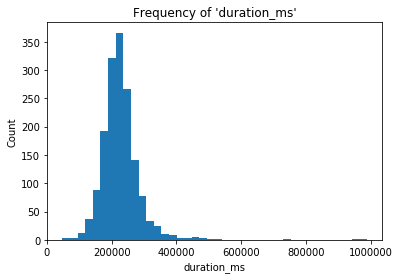

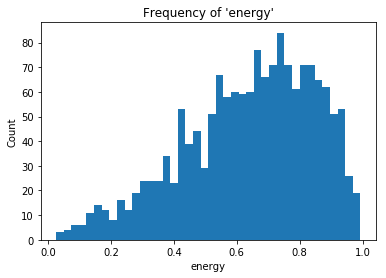

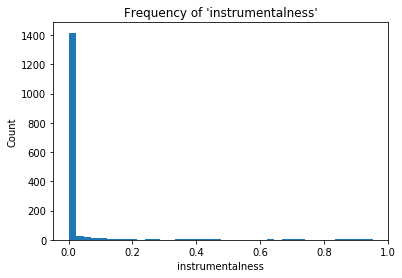

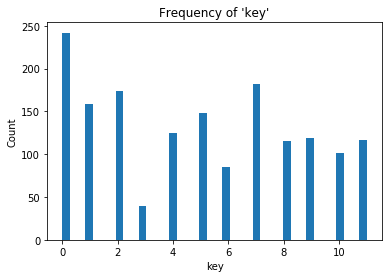

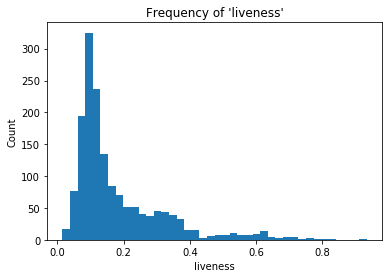

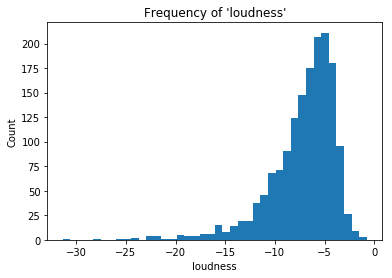

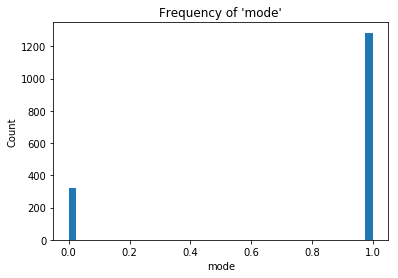

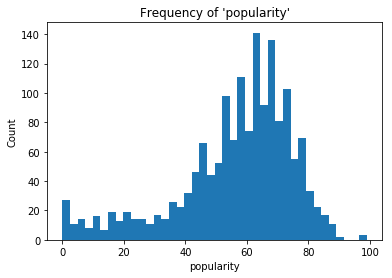

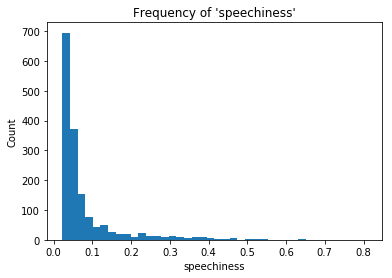

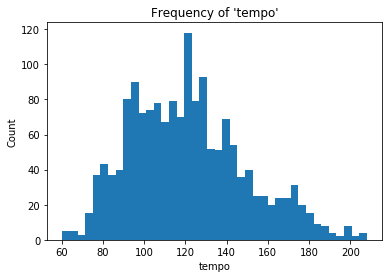

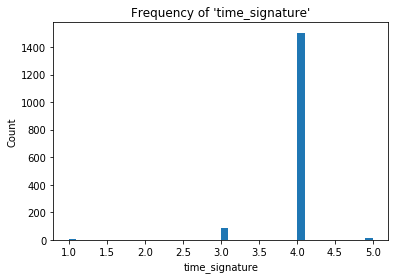

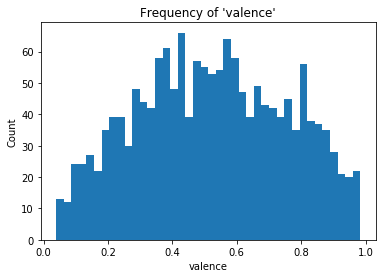

In [4]:
for column in data:
    if(data[column].dtype == 'int64' or data[column].dtype == 'float64'):
        show_hist(data, column)

## Create a new dataframe that removes all non-numeric attributes
We remove attributes like song name and artist, we are not losing any information on what we compare

In [5]:
filtered_data = data.copy()*1

# get rid of attributes with no correlation
for column in filtered_data:
    if(filtered_data[column].dtype == 'object'):
        filtered_data = filtered_data.drop(column, axis=1)

In [6]:
filtered_data.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
0,0.2110,0.772,385438,0.482,0,0.000000,6,0.223,-9.529,1,68,0.3510,92.017,4,0.441
1,0.6000,0.334,336093,0.472,0,0.000004,0,0.317,-8.792,1,74,0.0277,179.167,3,0.431
2,0.0152,0.728,231173,0.620,0,0.000000,3,0.227,-3.735,1,62,0.0308,110.023,4,0.453
3,0.8340,0.403,342653,0.387,0,0.699000,9,0.181,-11.312,1,44,0.0397,126.283,4,0.588
4,0.0606,0.576,217987,0.486,0,0.000143,4,0.093,-9.364,1,50,0.0406,141.951,4,0.337


## Show relationships between attributes

In [7]:
def show_relationship(data, x, y):
    print('%s vs %s\n' % (y, x))
    print('Correlation coefficient: ')
    print(np.corrcoef(data[x], data[y]))
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s vs %s' % (y , x))
    plt.show()
    

In [8]:
completed_pairs = []

cc_threshold = .4

for column_1 in filtered_data:
    for column_2 in filtered_data:
        if(column_1 == column_2):
            continue
        cc = np.corrcoef(filtered_data[column_1], filtered_data[column_2])
        if(abs(cc[0][1]) > cc_threshold and not(column_1+column_2 in completed_pairs)):
            print(column_1, column_2, cc[0][1])
            completed_pairs.append(column_2+column_1)

acousticness energy -0.7007905022141531
acousticness loudness -0.5955744202366778
danceability valence 0.4104245858846799
energy loudness 0.7525521513689056


energy vs danceability

Correlation coefficient: 
[[1.         0.09291882]
 [0.09291882 1.        ]]


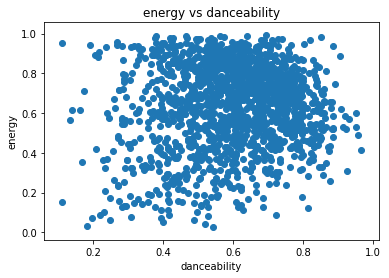

In [9]:
# the thought behind this is that when I think about songs that are danced to, they are often high energy
show_relationship(filtered_data, 'danceability', 'energy')

### Almost no correlation, crazy!


Using the results from above we can see the attributes with the highest correlation between eachother. The corresponding plots are shown below.

energy vs acousticness

Correlation coefficient: 
[[ 1.        -0.7007905]
 [-0.7007905  1.       ]]


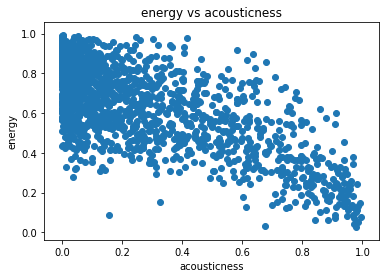

In [10]:
show_relationship(filtered_data, 'acousticness', 'energy')

energy vs acousticness

Correlation coefficient: 
[[ 1.        -0.7007905]
 [-0.7007905  1.       ]]


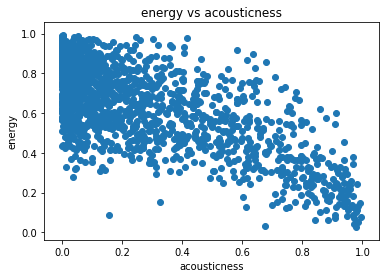

In [11]:
show_relationship(filtered_data, 'acousticness', 'energy')

loudness vs acousticness

Correlation coefficient: 
[[ 1.         -0.59557442]
 [-0.59557442  1.        ]]


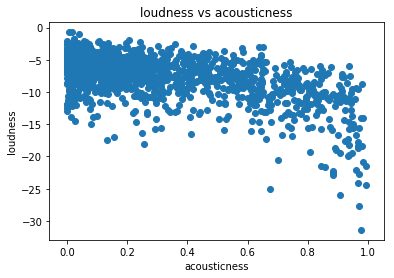

In [12]:
show_relationship(filtered_data, 'acousticness', 'loudness')

valence vs danceability

Correlation coefficient: 
[[1.         0.41042459]
 [0.41042459 1.        ]]


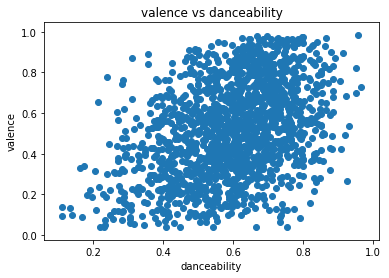

In [13]:
show_relationship(filtered_data, 'danceability', 'valence')

loudness vs energy

Correlation coefficient: 
[[1.         0.75255215]
 [0.75255215 1.        ]]


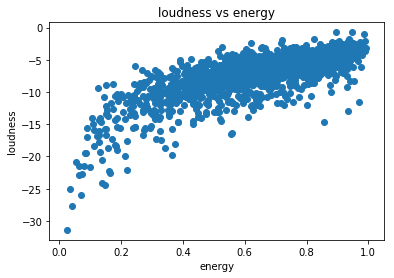

In [14]:
show_relationship(filtered_data, 'energy', 'loudness')

## Zero center and divide by the standard deviation to normalize

In [15]:
filtered_data_means = {}
filtered_data_stds = {}
for column in filtered_data:
    if(column == 'explicit'):
        continue
    
    filtered_data_means[column] = filtered_data[column].mean()
    filtered_data_stds[column] = filtered_data[column].std()
    
    filtered_data[column] -= filtered_data[column].mean()
    filtered_data[column] /= filtered_data[column].std()
    
# for column in filtered_data:
#     if(column == 'explicit'):
#         continue
#     i = 0
#     col_min = filtered_data[column].min()
#     col_max = filtered_data[column].max()
#     for entry in filtered_data[column]:
#         filtered_data[column][i] = (entry - col_min) / (col_max - col_min)
#         i += 1

In [16]:
filtered_data.head(20)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
0,-0.166653,1.185494,2.628511,-0.754677,0,-0.274536,0.293064,0.298874,-0.671118,0.501204,0.614594,2.939420,-1.047646,0.175151,-0.350940
1,1.227571,-1.793877,1.812356,-0.802662,0,-0.274512,-1.369183,0.973455,-0.457327,0.501204,0.928396,-0.585881,2.077972,-3.301917,-0.393905
2,-0.868424,0.886196,0.077001,-0.092475,0,-0.274536,-0.538059,0.327579,1.009615,0.501204,0.300792,-0.552078,-0.401864,0.175151,-0.299382
3,2.066255,-1.324525,1.920857,-1.210540,0,4.071559,1.124187,-0.002535,-1.188333,0.501204,-0.640614,-0.455031,0.181298,0.175151,0.280645
4,-0.705705,-0.147741,-0.141092,-0.735482,0,-0.273647,-0.261018,-0.634059,-0.623254,0.501204,-0.326812,-0.445217,0.743227,0.175151,-0.797775
5,-0.860539,-1.195282,0.459633,0.828850,0,-0.274476,-1.369183,-0.325474,0.779870,0.501204,-2.418826,-0.499738,2.828981,0.175151,-0.381015
6,-0.653377,0.614107,-0.556572,0.320202,0,-0.274536,-0.815101,-0.638365,-0.205827,0.501204,0.614594,-0.429952,0.375757,0.175151,1.371954
7,-0.385285,0.824976,0.446169,0.123461,0,-0.268816,0.847146,-0.268062,-0.398441,0.501204,0.509993,-0.526998,-0.868967,0.175151,1.032531
8,0.747298,0.518876,-0.754619,-0.265223,0,-0.262411,0.847146,0.040523,-0.286760,0.501204,0.143891,-0.541174,-0.822558,0.175151,1.878941
9,-0.594239,1.219505,-0.630902,1.155152,0,-0.274536,1.124187,1.081101,-0.824571,0.501204,-1.006717,-0.292560,0.100745,0.175151,0.804817


In [17]:
for column in filtered_data:
    print(column)
    print(filtered_data[column].min())
    print(filtered_data[column].max())

acousticness
-0.9228965805492458
2.6432989332970336
danceability
-3.2971674794166055
2.4983215278957047
duration_ms
-2.9535840147511325
12.582634848094138
energy
-2.9452214316297103
1.6973898991653538
explicit
0
1
instrumentalness
-0.27453575190374097
5.657043975720002
key
-1.369182807272869
1.6782697528180464
liveness
-1.188794784300992
5.401295945269865
loudness
-7.010269788410887
1.8801497076846505
mode
-1.9939543848066648
0.5012040982821423
popularity
-2.9418293868343603
2.2359048223127242
speechiness
-0.6425819691550761
7.922600776358023
tempo
-2.1831614356153457
3.1109501500718952
time_signature
-10.256052092915747
3.6522184239794853
valence
-2.0807081084266663
1.9820565465582702


## Graph results to make sure I didn't screw anything up (cross check with graphs above)

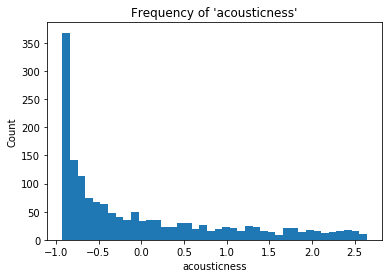

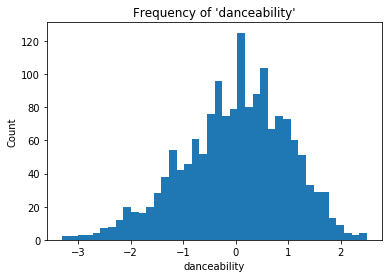

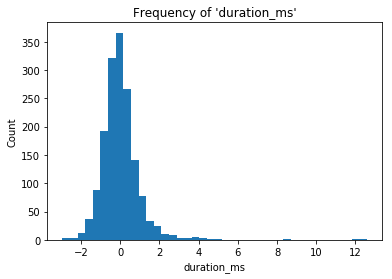

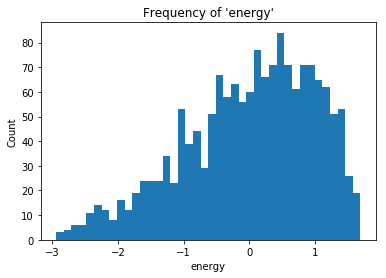

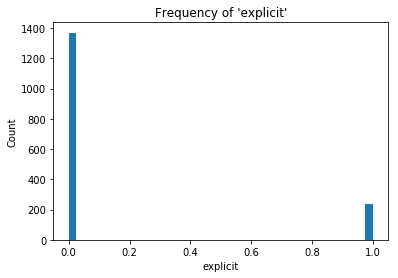

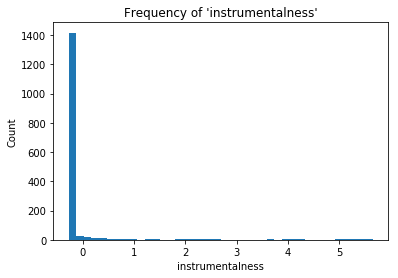

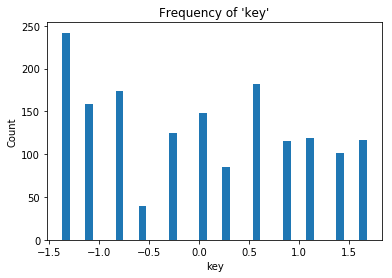

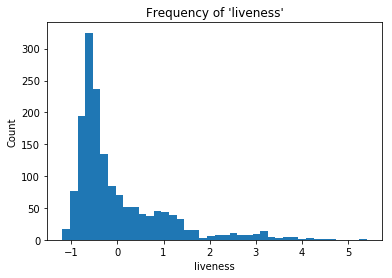

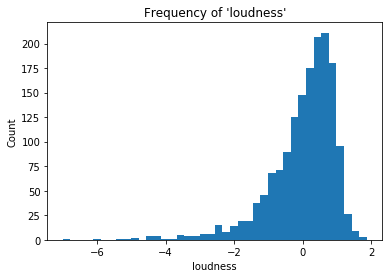

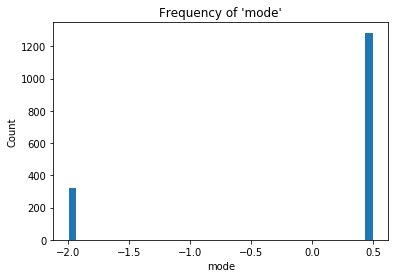

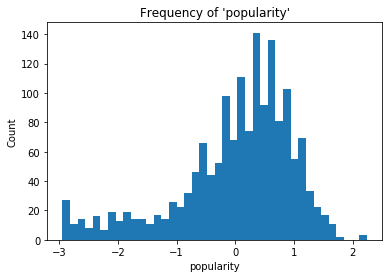

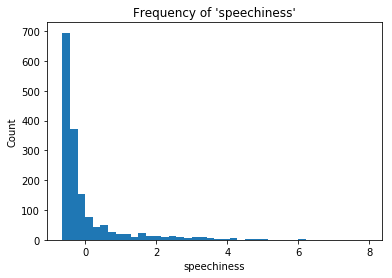

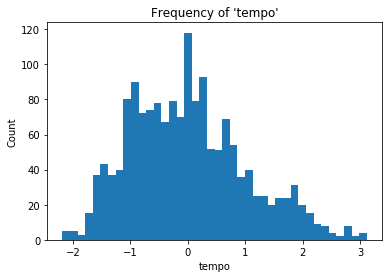

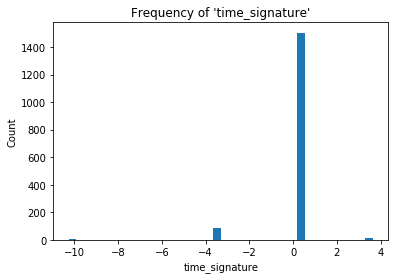

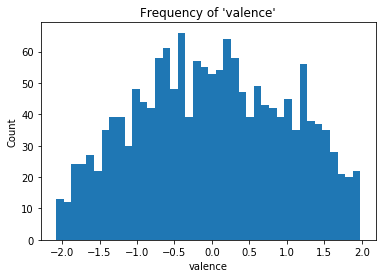

In [18]:
for column in filtered_data:
    show_hist(filtered_data, column)

## Create rank 2 approximation in order to plot the dataset // generate centroid (using PCA)

In [19]:
x = filtered_data.values
pca = PCA(n_components=2, whiten=True)
reduced_comps = pca.fit_transform(x)

reduced_dim_df = pd.DataFrame(data=reduced_comps, columns=['pc1', 'pc2'])

centroid = [reduced_dim_df['pc1'].mean(), reduced_dim_df['pc2'].mean()]

## Generate a pseudo-centroid which is in the most dense area of the plot

In [20]:
def get_most_dense(data, bins):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)

    h_max = -1
    h_max_i = (-1, 0)
    i = 0
    for elem in hist:
        if(elem > h_max):
            h_max = elem
            h_max_i = (bin_edges[i], bin_edges[i+1])
        i+=1

    return (h_max_i[0] + h_max_i[1])/2
pseudo_centroid = [get_most_dense(reduced_dim_df['pc1'], 50), get_most_dense(reduced_dim_df['pc2'], 50)]
print(pseudo_centroid)

[-0.5832491154571178, 0.26135854482791654]


## Plot scatter plot with some variance on the points

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


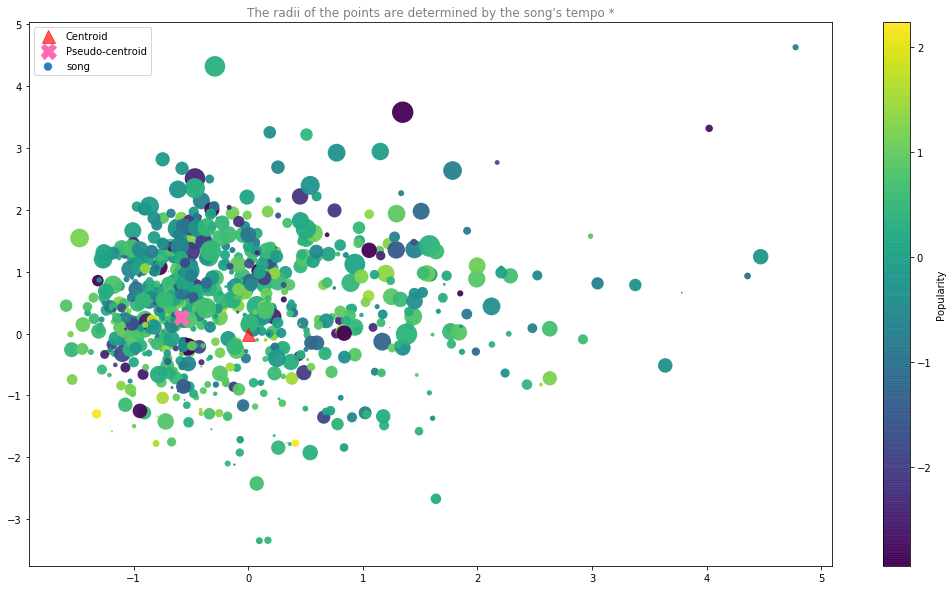

In [21]:
plt.figure(figsize=(18, 10))
plt.scatter(reduced_dim_df['pc1'],reduced_dim_df['pc2'], filtered_data['tempo']*150, filtered_data['popularity'],
            edgecolor='none', alpha=.95,
           label='song')
plt.plot(centroid[0], centroid[1], '^', markersize=13, alpha=.65, color="red", markeredgecolor='red',
         label='Centroid')
plt.plot(pseudo_centroid[0], pseudo_centroid[1], 'X', markersize=15, alpha=1, color="hotpink", markeredgecolor='hotpink',
         label='Pseudo-centroid')
plt.colorbar(label='Popularity')
plt.title('The radii of the points are determined by the song\'s tempo *', color='grey')
plt.legend()
plt.show()

## Plot density map

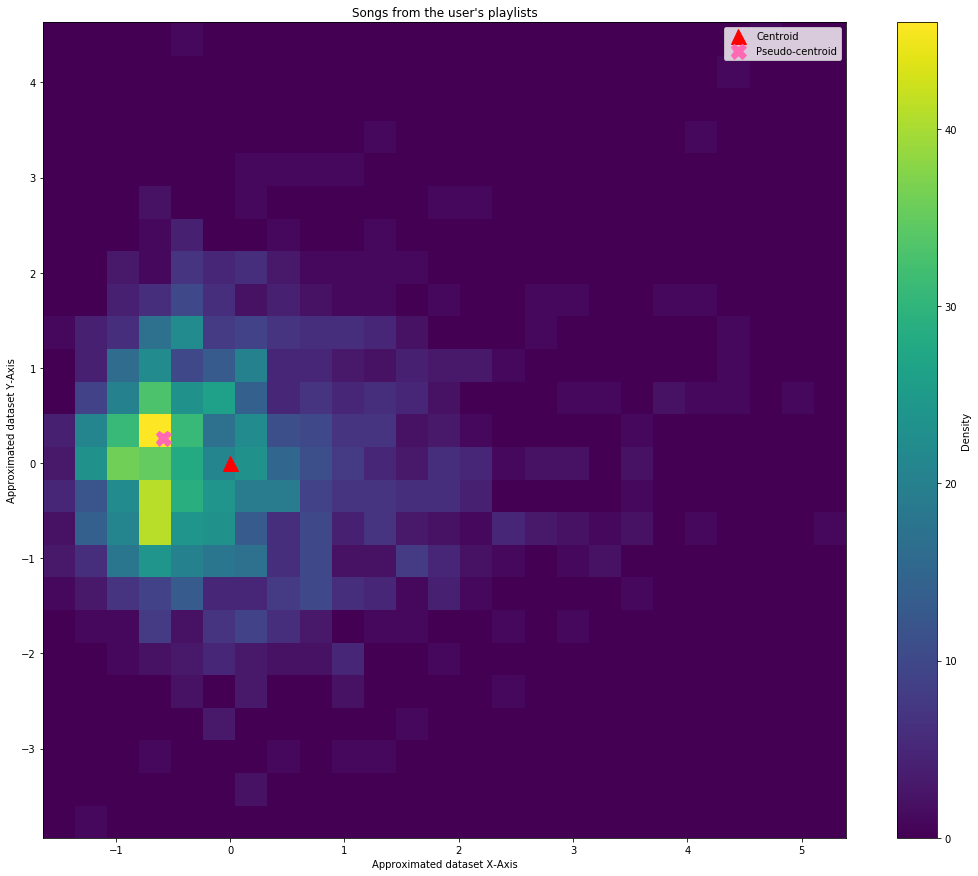

In [22]:
plt.figure(figsize=(18, 15))
plt.hist2d(x=reduced_dim_df['pc1'], y=reduced_dim_df['pc2'], bins=25)
plt.plot(centroid[0], centroid[1], '^', markersize=15, alpha=1, color="red", markeredgecolor='red',
         label='Centroid')
plt.plot(pseudo_centroid[0], pseudo_centroid[1], 'X', markersize=15, alpha=1, color="hotpink", markeredgecolor='hotpink',
         label='Pseudo-centroid')
plt.colorbar(label='Density')
plt.title('Songs from the user\'s playlists')
plt.xlabel("Approximated dataset X-Axis")
plt.ylabel("Approximated dataset Y-Axis")
plt.legend()
plt.show()

## Making recommendations

In [23]:
killers_data = pd.read_json('artists/The_Killers.txt')

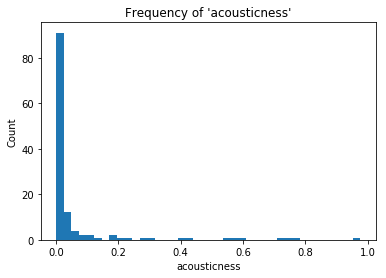

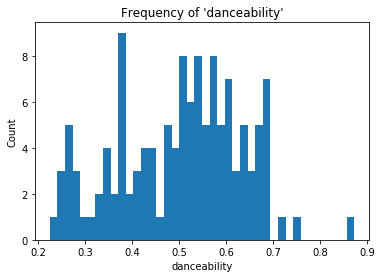

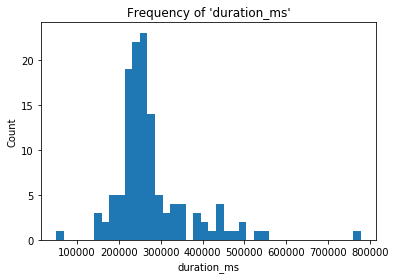

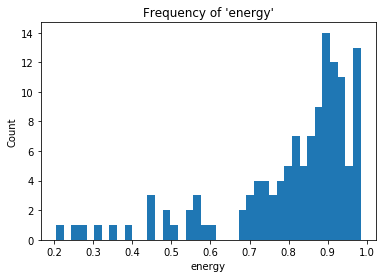

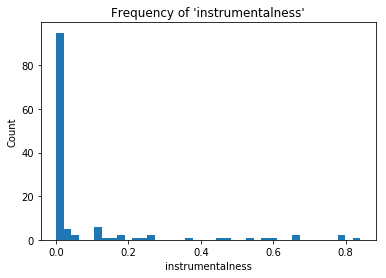

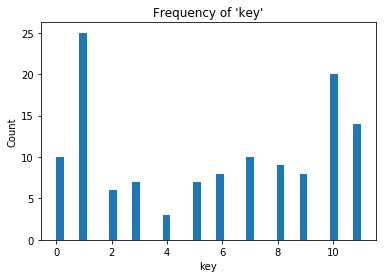

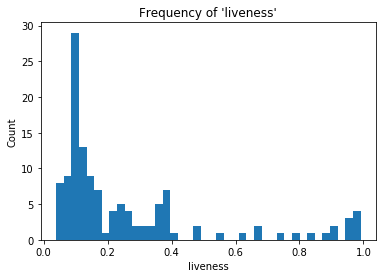

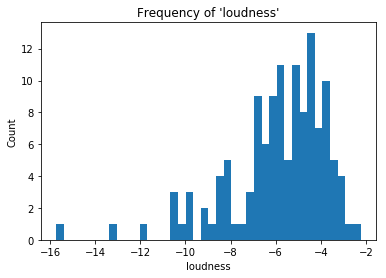

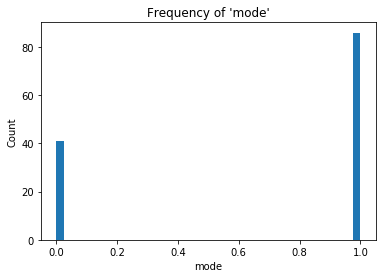

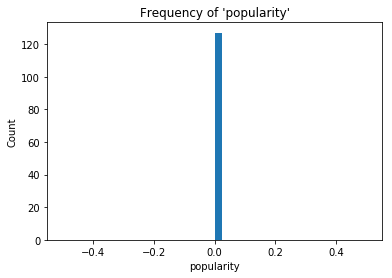

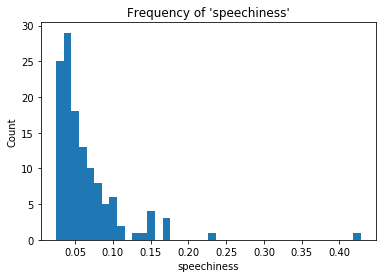

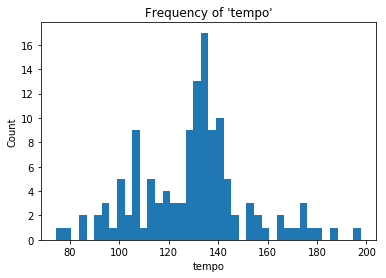

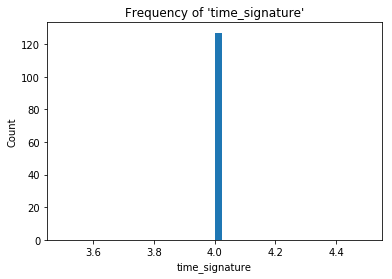

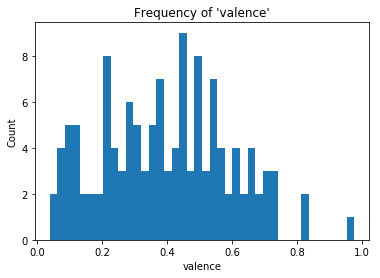

In [24]:
for column in killers_data:
    if(killers_data[column].dtype == 'int64' or killers_data[column].dtype == 'float64'):
        show_hist(killers_data, column)

In [25]:
filtered_kdata = killers_data.copy()*1

# get rid of attributes with no correlation
for column in filtered_kdata:
    if(filtered_kdata[column].dtype == 'object'):
        filtered_kdata = filtered_kdata.drop(column, axis=1)

## Normalize based on the other ground truth dataset

In [26]:
for column in filtered_kdata:
    if(column == 'explicit'):
        continue
    # subtract mean
    filtered_kdata[column] -= filtered_data_means[column]
    # divide by std deviation
    filtered_kdata[column] /= filtered_data_stds[column]

In [27]:
x = filtered_kdata.values
pca = PCA(n_components=2, whiten=True)
reduced_comps = pca.fit_transform(x)

reduced_dim_kd = pd.DataFrame(data=reduced_comps, columns=['pc1', 'pc2'])
len(reduced_dim_kd['pc1'])

127

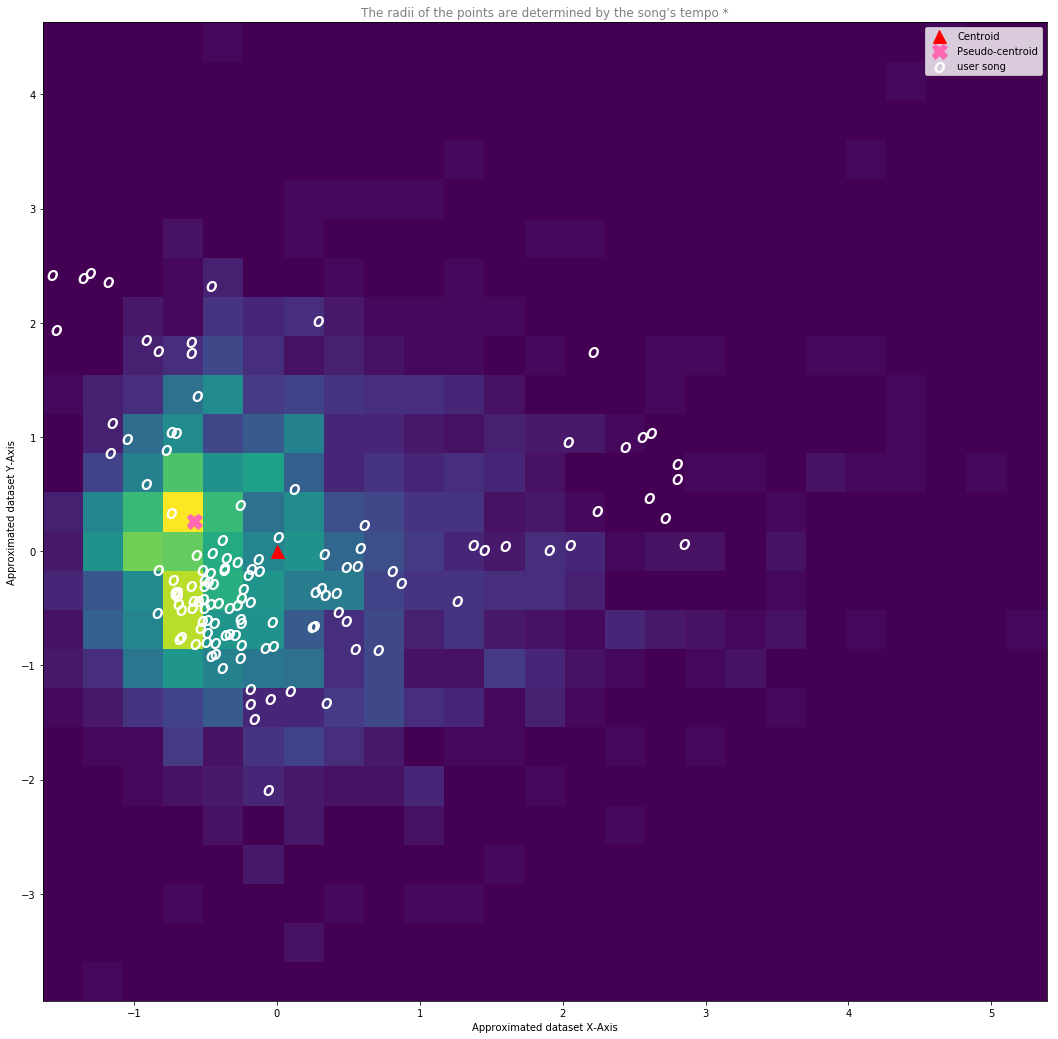

In [28]:
plt.figure(figsize=(18, 18))
plt.hist2d(x=reduced_dim_df['pc1'], y=reduced_dim_df['pc2'], bins=25)
plt.plot(centroid[0], centroid[1], '^', markersize=13, color="red", markeredgecolor='red',
         label='Centroid')
plt.plot(pseudo_centroid[0], pseudo_centroid[1], 'X', markersize=15, color="hotpink", markeredgecolor='hotpink',
         label='Pseudo-centroid')
plt.scatter(reduced_dim_kd['pc1'],reduced_dim_kd['pc2'], 100, marker='$O$', color='white', label='user song',
            zorder=1000)
plt.title('The radii of the points are determined by the song\'s tempo *', color='grey')
plt.xlabel("Approximated dataset X-Axis")
plt.ylabel("Approximated dataset Y-Axis")

plt.legend()
plt.show()

## True Centroid matches

In [29]:
distances = []
for i in range(len(reduced_dim_kd)):
    distance = math.sqrt(((reduced_dim_kd['pc1'][i] - centroid[0])**2)+((reduced_dim_kd['pc2'][i] - centroid[1])**2))
    distances.append((distance, i))
distances.sort()

n = 10
print('%d best matches:' % n)
for i in range(1, n+1):
    song_name = killers_data['name'][distances[i-1][1]]
    distance = distances[i-1][0]
    print('%d. %s - distance: %.2f' % (i, song_name, distance))

10 best matches:
1. Miss Atomic Bomb - distance: 0.13
2. Spaceman - Bimbo Jones Radio Mix - distance: 0.15
3. The World We Live In - distance: 0.21
4. Deadlines And Commitments - distance: 0.24
5. Four Winds - distance: 0.29
6. Here With Me - distance: 0.29
7. The Rising Tide - distance: 0.33
8. All The Pretty Faces - distance: 0.36
9. A Matter Of Time - distance: 0.40
10. Bling (Confession Of A King) - distance: 0.40


In [30]:
distances = []
for i in range(len(reduced_dim_kd)):
    distance = math.sqrt(((reduced_dim_kd['pc1'][i] - pseudo_centroid[0])**2)+((reduced_dim_kd['pc2'][i] - pseudo_centroid[1])**2))
    distances.append((distance, i))
distances.sort()

n = 10
print('%d best matches:' % n)
for i in range(1, n+1):
    song_name = killers_data['name'][distances[i-1][1]]
    distance = distances[i-1][0]
    print('%d. %s - distance: %.2f' % (i, song_name, distance))

10 best matches:
1. Everything Will Be Alright - distance: 0.17
2. Bling (Confession Of A King) - distance: 0.26
3. Human - Ocelot Remix - distance: 0.29
4. All These Things That I've Done - distance: 0.30
5. Romeo And Juliet - distance: 0.35
6. All The Pretty Faces - distance: 0.39
7. The Calling - distance: 0.43
8. A Matter Of Time - distance: 0.46
9. Some Kind Of Love - distance: 0.47
10. Spaceman - Tiesto Remix Edit - distance: 0.47


In [31]:
def recommend(user_data_file='The_Killers.txt', n=10, hist=False, plot=False, true_cent=False, pseudo=False,
              non_reduced=False, aggregate=False):
    user_data = pd.read_json(user_data_file)
    
    if(hist):
        print("Histograms for user data:")
        for column in user_data:
            if(user_data[column].dtype == 'int64' or user_data[column].dtype == 'float64'):
                show_hist(user_data, column)
    
    filtered_user_data= user_data.copy()*1

    # get rid of attributes with no correlation
    for column in filtered_user_data:
        if(filtered_user_data[column].dtype == 'object'):
            filtered_user_data = filtered_user_data.drop(column, axis=1)
    
    for column in filtered_user_data:
        if(column == 'explicit'):
            continue
        # subtract mean
        filtered_user_data[column] -= filtered_data_means[column]
        # divide by std deviation
        filtered_user_data[column] /= filtered_data_stds[column]
            
    x = filtered_user_data.values
    pca = PCA(n_components=2, whiten=True)
    reduced_comps = pca.fit_transform(x)

    reduced_dim_ud = pd.DataFrame(data=reduced_comps, columns=['pc1', 'pc2'])
        
    
    def show_plot(pairs_list, n, td=reduced_dim_df, tc=centroid, pc=pseudo_centroid, ud=reduced_dim_ud):
        plt.figure(figsize=(18, 15))
        plt.hist2d(x=td['pc1'], y=td['pc2'], bins=25)
        plt.title("Reccomended Songs")
        plt.xlabel("Approximated dataset X-Axis")
        plt.ylabel("Approximated dataset Y-Axis")
        plt.colorbar()
        plt.plot(tc[0], tc[1], marker="^", markersize=13, color="#FF0000", markeredgecolor='#FF0000', label='Centroid')
        plt.plot(pc[0], pc[1], 'X', markersize=15, color="hotpink", markeredgecolor='hotpink',
                 label='Pseudo-centroid')
        plt.scatter(reduced_dim_ud['pc1'],reduced_dim_ud['pc2'], 100, marker='$O$', color='white', label='user song',
                    zorder=10)

        flag = True
        for pair in pairs_list[:n]:
            index = pair[1]
            if(flag):
                plt.scatter(ud['pc1'][index], ud['pc2'][index], 100, marker='$O$', color='#FF6600',
                            zorder=11, label="recommended song")
                flag = False
            else:
                plt.scatter(ud['pc1'][index], ud['pc2'][index], 100, marker='$O$', color='#FF6600',
                            zorder=11)
        #plt.title('The radii of the points are determined by the song\'s tempo *', color='grey')
        #plt.colorbar()
        plt.legend()
        plt.show()
        
        
    ranking_aggregate = [0] * len(reduced_dim_ud)

    
    ###
    # reduced dimension
    reduced_dim_distances = []
    for i in range(len(reduced_dim_ud)):
        distance = math.sqrt(((reduced_dim_ud['pc1'][i] - centroid[0])**2)+((reduced_dim_ud['pc2'][i] - centroid[1])**2))
        reduced_dim_distances.append((distance, i))
    reduced_dim_distances.sort()

    for i in range(len(reduced_dim_distances)):
        ranking_aggregate[reduced_dim_distances[i][1]] = (i+1, reduced_dim_distances[i][1])

    if(true_cent):
        print('%d best matches (true centroid)' % n)
        for i in range(1, n+1):
            song_name = user_data['name'][reduced_dim_distances[i-1][1]]
            song_artist = user_data['artist'][reduced_dim_distances[i-1][1]]
            distance = reduced_dim_distances[i-1][0]
            print('%d. %s by %s - distance: %.2f' % (i, song_name, song_artist, distance))

        if(plot):
            show_plot(reduced_dim_distances, n)

        print()
    

    
    ###
    # pseudo Centroid
    pseudo_distances = []
    for i in range(len(reduced_dim_ud)):
        distance = math.sqrt(((reduced_dim_ud['pc1'][i] - pseudo_centroid[0])**2)+((reduced_dim_ud['pc2'][i] - pseudo_centroid[1])**2))
        pseudo_distances.append((distance, i))
    pseudo_distances.sort()

    for i in range(len(pseudo_distances)):
        curr_val = ranking_aggregate[pseudo_distances[i][1]][0]
        ranking_aggregate[pseudo_distances[i][1]] = (curr_val + i+1, pseudo_distances[i][1])

    if(pseudo):
        print('%d best matches (pseudo centroid)' % n)
        for i in range(1, n+1):
            song_name = user_data['name'][pseudo_distances[i-1][1]]
            song_artist = user_data['artist'][pseudo_distances[i-1][1]]
            distance = pseudo_distances[i-1][0]
            print('%d. %s by %s - distance: %.2f' % (i, song_name, song_artist, distance))

        if(plot):
            show_plot(pseudo_distances, n)    

        print()
    
    
    ###
    # non-reduced
    non_reduced_distances = []
    for i in range(len(filtered_user_data)):
        for col in filtered_user_data:
            distance += ((filtered_user_data[col][i])**2)+((filtered_user_data[col][i])**2)
        distance = math.sqrt(distance)
        non_reduced_distances.append((distance, i))
    non_reduced_distances.sort()

    for i in range(len(non_reduced_distances)):
        curr_val = ranking_aggregate[non_reduced_distances[i][1]][0]
        ranking_aggregate[non_reduced_distances[i][1]] = (curr_val + i+1, non_reduced_distances[i][1])

    if(non_reduced):
        print('%d best matches (uncompressed)' % n)
        for i in range(1, n+1):
            song_name = user_data['name'][non_reduced_distances[i-1][1]]
            song_artist = user_data['artist'][non_reduced_distances[i-1][1]]
            distance = non_reduced_distances[i-1][0]
            print('%d. %s by %s - distance: %.2f' % (i, song_name, song_artist, distance))

        if(plot):
            show_plot(non_reduced_distances, n)

        print()
    
    
    if(aggregate):
        ###
        # aggregate of the rankings
        for i in range(len(ranking_aggregate)):
            #print(ranking_aggregate[i])
            ranking_aggregate[i] = (ranking_aggregate[i][0]/3.0,ranking_aggregate[i][1])
        #print(ranking_aggregate)
        ranking_aggregate.sort()

        print('%d best matches (aggregate)' % n)
        for i in range(1, n+1):
            song_name = user_data['name'][ranking_aggregate[i-1][1]]
            song_artist = user_data['artist'][ranking_aggregate[i-1][1]]
            rank = ranking_aggregate[i-1][0]
            print('%d. %s by %s - rank average: %.2f' % (i, song_name, song_artist, rank))
            
        if(plot):
            show_plot(ranking_aggregate, n)
        
        print()

10 best matches (aggregate)
1. Deadlines And Commitments by The Killers - rank average: 9.33
2. Spaceman - Bimbo Jones Radio Mix by The Killers - rank average: 10.00
3. Four Winds by The Killers - rank average: 11.33
4. All These Things That I've Done by The Killers - rank average: 11.67
5. Miss Atomic Bomb by The Killers - rank average: 12.00
6. The World We Live In by The Killers - rank average: 14.67
7. Here With Me by The Killers - rank average: 17.67
8. Human - Ocelot Remix by The Killers - rank average: 20.00
9. Human - Ferry Corsten Radio Remix by The Killers - rank average: 21.00
10. Romeo And Juliet by The Killers - rank average: 21.00


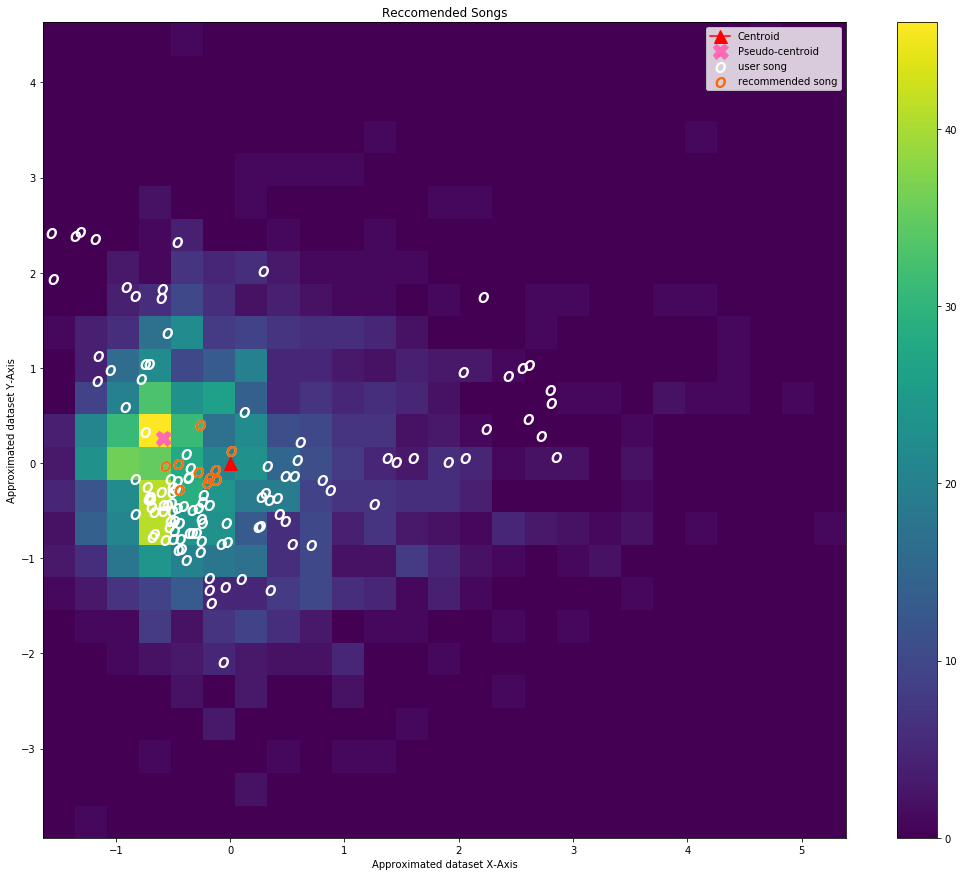

In [32]:
recommend(user_data_file='artists/The_Killers.txt', n=10, aggregate=True, plot=True)

10 best matches (pseudo centroid)
1. Walcott (Insane Mix) by Vampire Weekend - distance: 0.15
2. Harmony Hall by Vampire Weekend - distance: 0.22
3. Ya Hey by Vampire Weekend - distance: 0.23
4. Taxi Cab by Vampire Weekend - distance: 0.28
5. Arrows by Vampire Weekend - distance: 0.45
6. Step by Vampire Weekend - distance: 0.46
7. Unbearably White by Vampire Weekend - distance: 0.51
8. This Life by Vampire Weekend - distance: 0.51
9. Everlasting Arms by Vampire Weekend - distance: 0.51
10. Diplomat’s Son by Vampire Weekend - distance: 0.52


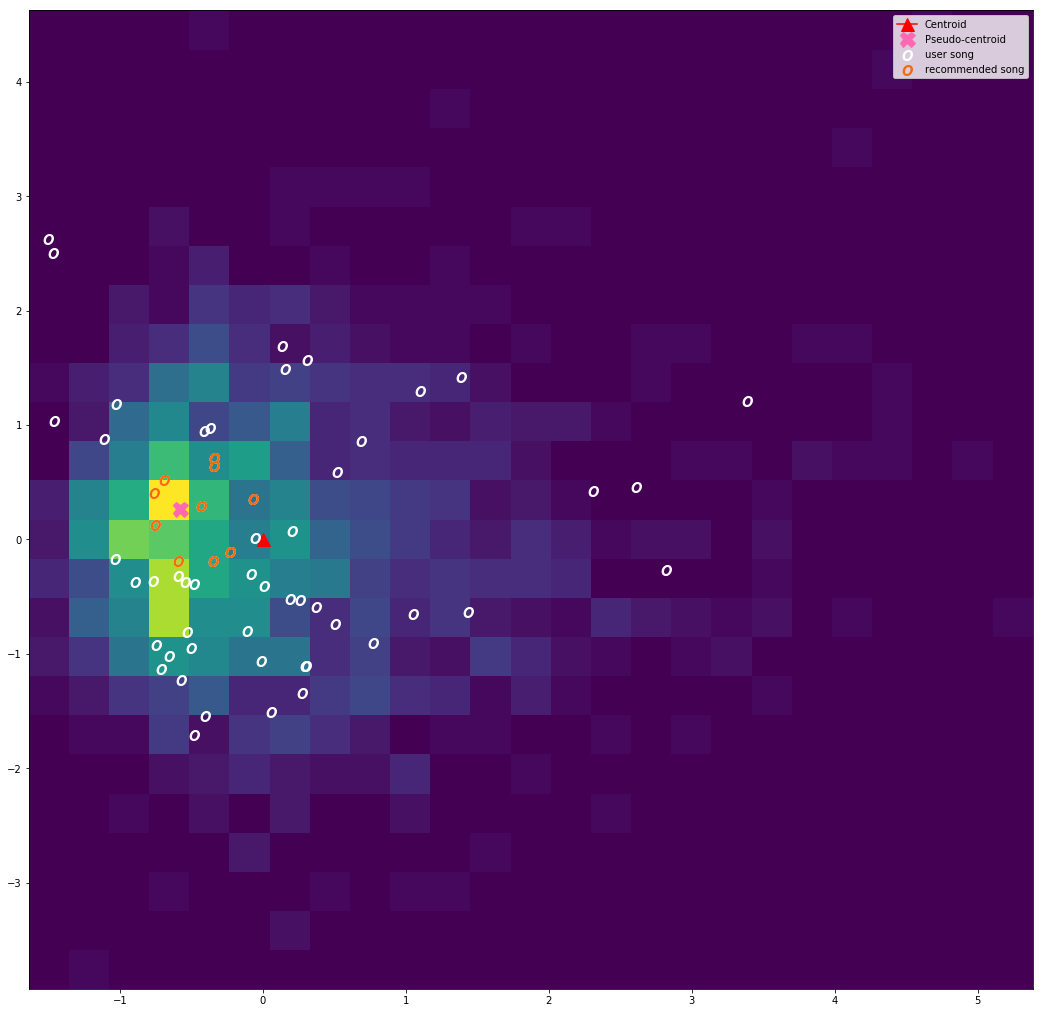

In [453]:
recommend(user_data_file='artists/Vampire_Weekend.txt', n=10, pseudo=True, plot=True)

10 best matches (uncompressed)
1. Jonathan Low by Vampire Weekend - distance: 5.70
2. Walcott (Insane Mix) by Vampire Weekend - distance: 5.79
3. Run by Vampire Weekend - distance: 5.86
4. Walcott by Vampire Weekend - distance: 6.03
5. Finger Back by Vampire Weekend - distance: 6.04
6. White Sky (New Look Remix) by Vampire Weekend - distance: 6.13
7. M79 by Vampire Weekend - distance: 6.14
8. Step by Vampire Weekend - distance: 6.15
9. Ya Hey by Vampire Weekend - distance: 6.16
10. Everlasting Arms by Vampire Weekend - distance: 6.17


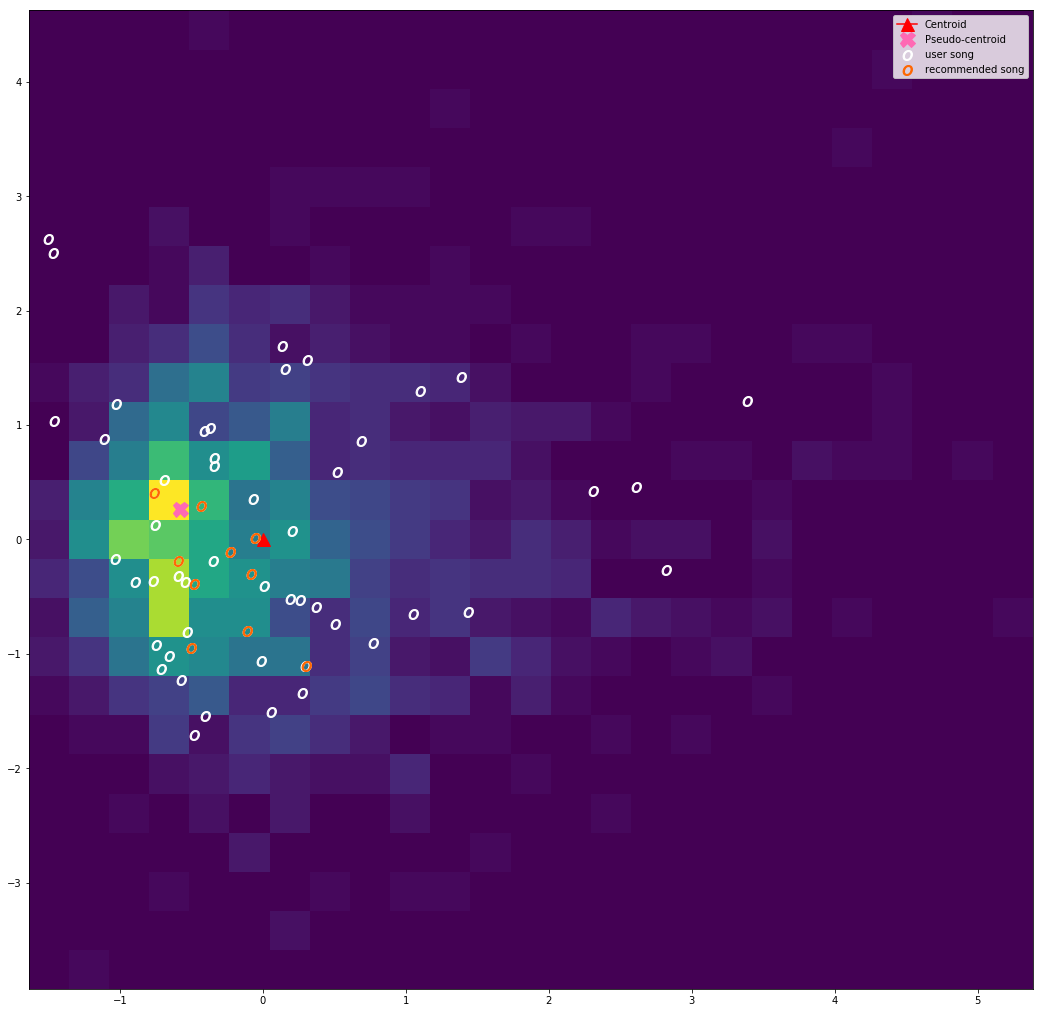

In [454]:
recommend(user_data_file='artists/Vampire_Weekend.txt', n=10, non_reduced=True, plot=True)

10 best matches (aggregate)
1. Walcott (Insane Mix) by Vampire Weekend - rank average: 3.67
2. Jonathan Low by Vampire Weekend - rank average: 4.33
3. Everlasting Arms by Vampire Weekend - rank average: 7.33
4. Step by Vampire Weekend - rank average: 8.67
5. Walcott by Vampire Weekend - rank average: 9.33
6. This Life by Vampire Weekend - rank average: 9.33
7. White Sky (New Look Remix) by Vampire Weekend - rank average: 11.00
8. Ya Hey by Vampire Weekend - rank average: 11.33
9. Harmony Hall by Vampire Weekend - rank average: 11.67
10. Giving Up The Gun by Vampire Weekend - rank average: 12.33


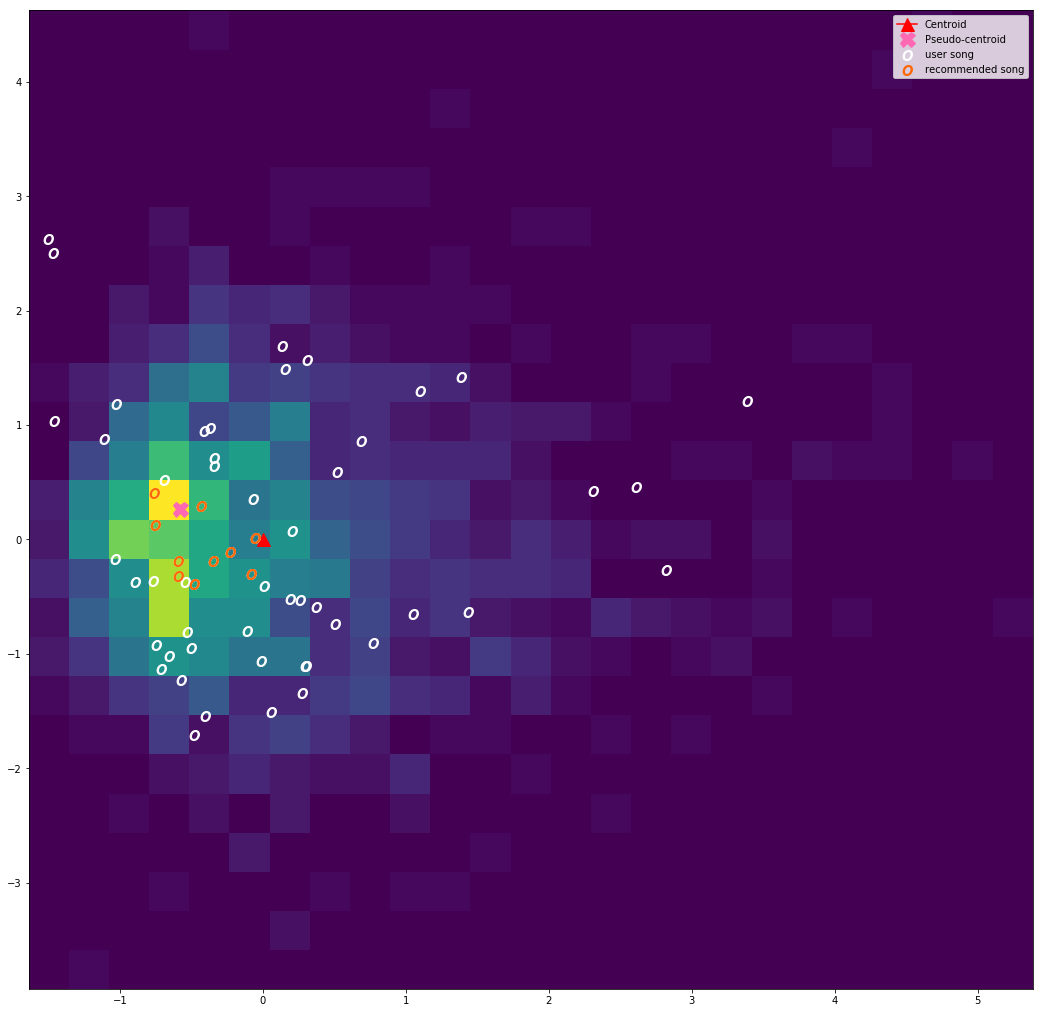

In [455]:
recommend(user_data_file='artists/Vampire_Weekend.txt', n=10, aggregate=True, plot=True)